# ZAF202303_NLP_NewsClassifier ( DEMO )

This is a Demo File, Yulia will add the explaination in the Markdown by EOD. Thank you.

## Importing Libraries

In [1]:
# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

# Computations
import itertools

# Visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

f:\Favorites\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Dataset

In [2]:
train = pd.read_csv("C:/Users/SD777/OneDrive/Desktop/rough/train.csv")
test  = pd.read_csv ("C:/Users/SD777/OneDrive/Desktop/rough/test.csv")
submit  = pd.read_csv ("C:/Users/SD777/OneDrive/Desktop/rough/submit.csv")

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
print(f"Train Shape : {train.shape}")
print(f"Test Shape : {test.shape}")
print(f"Submit Shape : {submit.shape}")

Train Shape : (20800, 5)
Test Shape : (5200, 4)
Submit Shape : (5200, 2)


## Data Preprocessing

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
train.dtypes.value_counts()

object    3
int64     2
dtype: int64

## Handle missing values

If model is trained on a concatenation of the title, the author and the main text, the model.

In [8]:
test=test.fillna(' ')
train=train.fillna(' ')

In [9]:
# Create a column with all the data available
test['total']=test['title']+' '+test['author']+' '+test['text']
train['total']=train['title']+' '+train['author']+' '+train['text']

In [10]:
# Have a glance at our training set
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
 5   total   20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [11]:
# Dividing the training set by using train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['total'], train.label, test_size=0.20, random_state=0)

# Vectorizing our Data

## 1. Count Vectorizer

In [12]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

## 2. Tf-IDF Vectorizer

In [13]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

## ML models with Count Vectorizer and TF-IDF Vectorizer

## 1. Multinomial Naive Bayes with Count Vectorizer

In [14]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_count)
print(acc_nb_count)

0.942548076923077


In [15]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

f:\Favorites\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.00 Score: 0.91106
Alpha: 0.05 Score: 0.94183
Alpha: 0.10 Score: 0.94255
Alpha: 0.15 Score: 0.94279
Alpha: 0.20 Score: 0.94231
Alpha: 0.25 Score: 0.94111
Alpha: 0.30 Score: 0.93990
Alpha: 0.35 Score: 0.93822
Alpha: 0.40 Score: 0.93750
Alpha: 0.45 Score: 0.93630
Alpha: 0.50 Score: 0.93510
Alpha: 0.55 Score: 0.93486
Alpha: 0.60 Score: 0.93341
Alpha: 0.65 Score: 0.93149
Alpha: 0.70 Score: 0.93029
Alpha: 0.75 Score: 0.92909
Alpha: 0.80 Score: 0.92788
Alpha: 0.85 Score: 0.92644
Alpha: 0.90 Score: 0.92428
Alpha: 0.95 Score: 0.92308


The best score is obtained for alpha = 0.15, and is equal to 0.94279.

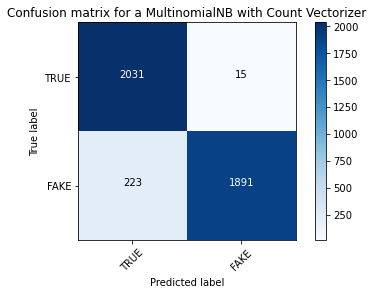

In [16]:
# Re-run our fine-tuned model and plot the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.15)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1])

# Creating a function that outputs a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

General accuracy of 94.3 %, which is good, but it does not really score well in view of number of false negative. 223 fake news are classified as true news with this model, which is not pleasing to see. So we will try to use the Tf-IDF vectorizer on this same model to see if it performs better.

## 2. Multinomial Naive Bayes with TF-IDF Vectorizer

In [17]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print(acc_nb_tfidf)

0.926923076923077


In [18]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

f:\Favorites\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.00  Score: 0.90649
Alpha: 0.01  Score: 0.94375
Alpha: 0.02  Score: 0.94375
Alpha: 0.03  Score: 0.94159
Alpha: 0.04  Score: 0.93966
Alpha: 0.05  Score: 0.93822
Alpha: 0.06  Score: 0.93462
Alpha: 0.07  Score: 0.93317
Alpha: 0.08  Score: 0.93005
Alpha: 0.09  Score: 0.92861


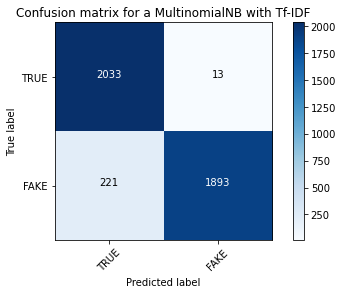

In [19]:
# Run the optimized model with best value of hyperparameter and check the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels=[0,1])
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')

Accuracy score is 94.4 %

## 3. Passive Agressive Classifier With Count Vectorizer

f:\Favorites\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9673076923076923


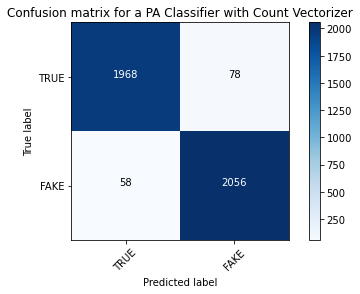

In [20]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(count_train, y_train)
pred_linear_count = linear_classifier.predict(count_test)
acc_linear_count = metrics.accuracy_score(y_test, pred_linear_count)
print(acc_linear_count)
cm6 = metrics.confusion_matrix(y_test, pred_linear_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')

## 4. Passive Agressive Classifier With TF-IDF Vectorizer


0.98125


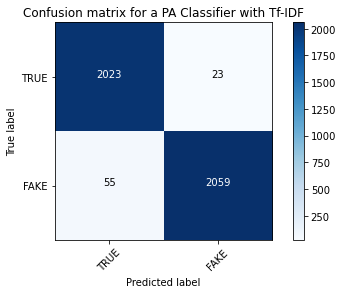

In [21]:
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(tfidf_train, y_train)
pred_linear_tfidf = linear_classifier.predict(tfidf_test)
acc_linear_tfidf = metrics.accuracy_score(y_test, pred_linear_tfidf)
print(acc_linear_tfidf)
cm5 = metrics.confusion_matrix(y_test, pred_linear_tfidf, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Tf-IDF')

## 5. Logistic Regression with CountVectorizer

0.9776442307692308


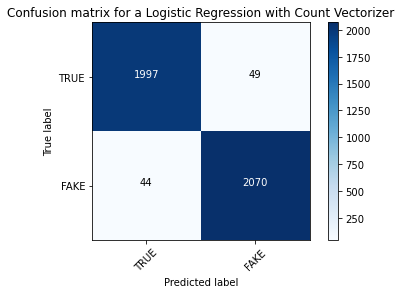

In [22]:
logreg = LogisticRegression(C=1e5)
logreg.fit(count_train, y_train)
pred_logreg_count = logreg.predict(count_test)
acc_logreg_count = metrics.accuracy_score(y_test,pred_logreg_count)
print(acc_logreg_count)
cm3 = metrics.confusion_matrix(y_test, pred_logreg_count, labels=[0,1])
plot_confusion_matrix(cm3, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Count Vectorizer')

Logistic Regression with CountVectorizer is the BEST MODEL, we have less fake news labeled as true news ie. only 44.